# Global Terrorist EDA Analysis

In [1]:
# import all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the Datasets
cleaned_datasets = pd.read_csv("Global-Terrorism-Cleaned-Datasets.csv")

In [5]:
# for showing all columns

pd.set_option('display.max_columns', None)

In [6]:
# Copy from the original Datasets
df = cleaned_datasets.copy()

In [13]:
df.sample(5)

,Eventid,Iyear,Imonth,Iday,Extended,Country,Country_Txt,Region,Region_Txt,Provstate,City,Latitude,Longitude,Specificity,Vicinity,Summary,Crit1,Crit2,Crit3,Doubtterr,Multiple,Success,Suicide,Attacktype1,Attacktype1_Txt,Targtype1,Targtype1_Txt,Targsubtype1,Targsubtype1_Txt,Corp1,Target1,Natlty1,Natlty1_Txt,Gname,Guncertain1,Individual,Nperps,Nperpcap,Claimed,Weaptype1,Weaptype1_Txt,Weapsubtype1,Weapsubtype1_Txt,Weapdetail,Nkill,Nkillus,Nkillter,Nwound,Nwoundus,Nwoundte,Property,Ishostkid,Scite1,Dbsource,Int_Log,Int_Ideo,Int_Misc,Int_Any
110826,201209090028,2012,9,9,0,95,Iraq,10,Middle East & North Africa,Nineveh,Mosul,36.354145,43.143570,1.0,0,09/09/2012: An explosives-laden vehicle detona...,1,1,1,0.0,1.0,1,0,3,Bombing/Explosion,14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Not Applicable,Civilians,95.0,Iraq,Al-Qaida in Iraq,0.0,0,-99.0,0.0,1.0,6,Explosives,15.0,Vehicle,Unknown,2.0,0.0,0.0,7.0,0.0,0.0,0,0.0,"""Qaeda claims latest deadly Iraq attacks,"" Age...",START Primary Collection,0,0,0,0
171096,201701110034,2017,1,10,0,1003,Kosovo,9,Eastern Europe,Kosovska Mitrovica,Mitrovica,42.891391,20.865999,1.0,0,01/10/2017: Assailants threw a grenade at a re...,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,2,Government (General),21.0,Government Building/Facility/Office,Government of Kosovo,Building,1003.0,Kosovo,Unknown,0.0,0,-99.0,0.0,0.0,6,Explosives,7.0,Grenade,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,"""Grenade Damages Govt Building in North Kosovo...",START Primary Collection,-9,-9,0,-9
135294,201407200061,2014,7,20,0,153,Pakistan,6,South Asia,Federally Administered Tribal Areas,Miran Shah district,32.999829,70.065025,3.0,0,07/20/2014: Assailants attacked a checkpost in...,1,1,0,1.0,0.0,1,0,2,Armed Assault,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Pakistan Army,Checkpost,153.0,Pakistan,Unknown,0.0,0,-99.0,0.0,0.0,5,Firearms,5.0,Unknown Gun Type,Unknown,1.0,0.0,0.0,0.0,0.0,0.0,-9,0.0,"""Pakistan: Airstrikes on terrorists' hideouts ...",START Primary Collection,-9,-9,0,-9
109731,201207290020,2012,7,28,0,95,Iraq,10,Middle East & North Africa,Saladin,Samarra,34.208416,43.890713,1.0,0,07/28/2012: Gunmen stormed the home of a schoo...,1,1,1,0.0,0.0,1,0,2,Armed Assault,8,Educational Institution,50.0,Other Personnel,Unknown,School Director: Hamid Majid,95.0,Iraq,Unknown,0.0,0,-99.0,0.0,0.0,5,Firearms,5.0,Unknown Gun Type,Unknown,5.0,0.0,0.0,0.0,0.0,0.0,0,0.0,"""Gunmen kill five Iraqi women from same fami...",START Primary Collection,-9,-9,0,-9
29016,198608270008,1986,8,27,0,53,Cyprus,8,Western Europe,Unknown,Unknown,0.000000,0.000000,5.0,0,Unknown,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),14,Private Citizens & Property,68.0,Named Civilian,Unknown,Kamil abd al-Husayn al-Zubaydi,95.0,Iraq,Hezbollah,0.0,0,0.0,0.0,0.0,13,Unknown,0.0,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,Unknown,PGIS,1,1,1,1


In [11]:
# check the null values

print(f" Here is the {df.isnull().sum().sum() } values in the datasets ")

 Here is the 0 values in the datasets 


In [12]:
# check the info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 58 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Eventid           181691 non-null  int64  
 1   Iyear             181691 non-null  int64  
 2   Imonth            181691 non-null  int64  
 3   Iday              181691 non-null  int64  
 4   Extended          181691 non-null  int64  
 5   Country           181691 non-null  int64  
 6   Country_Txt       181691 non-null  object 
 7   Region            181691 non-null  int64  
 8   Region_Txt        181691 non-null  object 
 9   Provstate         181691 non-null  object 
 10  City              181691 non-null  object 
 11  Latitude          181691 non-null  float64
 12  Longitude         181691 non-null  float64
 13  Specificity       181691 non-null  float64
 14  Vicinity          181691 non-null  int64  
 15  Summary           181691 non-null  object 
 16  Crit1             18

# Now, We Can start the EDA Analysis

# Discriptive Analysis

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Eventid,181691.0,2.002705e+11,1.325957e+09,1.970000e+11,1.991021e+11,2.009022e+11,2.014081e+11,2.017123e+11
Iyear,181691.0,2.002639e+03,1.325943e+01,1.970000e+03,1.991000e+03,2.009000e+03,2.014000e+03,2.017000e+03
Imonth,181691.0,6.467277e+00,3.388303e+00,0.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
Iday,181691.0,1.550564e+01,8.814045e+00,0.000000e+00,8.000000e+00,1.500000e+01,2.300000e+01,3.100000e+01
Extended,181691.0,4.534622e-02,2.080629e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Country,181691.0,1.319685e+02,1.124145e+02,4.000000e+00,7.800000e+01,9.800000e+01,1.600000e+02,1.004000e+03
Region,181691.0,7.160938e+00,2.933408e+00,1.000000e+00,5.000000e+00,6.000000e+00,1.000000e+01,1.200000e+01
Latitude,181691.0,2.290911e+01,1.869944e+01,-5.315461e+01,9.518645e+00,3.112665e+01,3.453856e+01,7.463355e+01
Longitude,181691.0,-4.471911e+02,2.021946e+05,-8.618590e+07,1.231572e+00,4.314357e+01,6.835734e+01,1.793667e+02
Specificity,181691.0,1.451404e+00,9.954480e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00


# Distributions 

In [14]:
df.columns

Index(['Eventid', 'Iyear', 'Imonth', 'Iday', 'Extended', 'Country',
       'Country_Txt', 'Region', 'Region_Txt', 'Provstate', 'City', 'Latitude',
       'Longitude', 'Specificity', 'Vicinity', 'Summary', 'Crit1', 'Crit2',
       'Crit3', 'Doubtterr', 'Multiple', 'Success', 'Suicide', 'Attacktype1',
       'Attacktype1_Txt', 'Targtype1', 'Targtype1_Txt', 'Targsubtype1',
       'Targsubtype1_Txt', 'Corp1', 'Target1', 'Natlty1', 'Natlty1_Txt',
       'Gname', 'Guncertain1', 'Individual', 'Nperps', 'Nperpcap', 'Claimed',
       'Weaptype1', 'Weaptype1_Txt', 'Weapsubtype1', 'Weapsubtype1_Txt',
       'Weapdetail', 'Nkill', 'Nkillus', 'Nkillter', 'Nwound', 'Nwoundus',
       'Nwoundte', 'Property', 'Ishostkid', 'Scite1', 'Dbsource', 'Int_Log',
       'Int_Ideo', 'Int_Misc', 'Int_Any'],
      dtype='object')

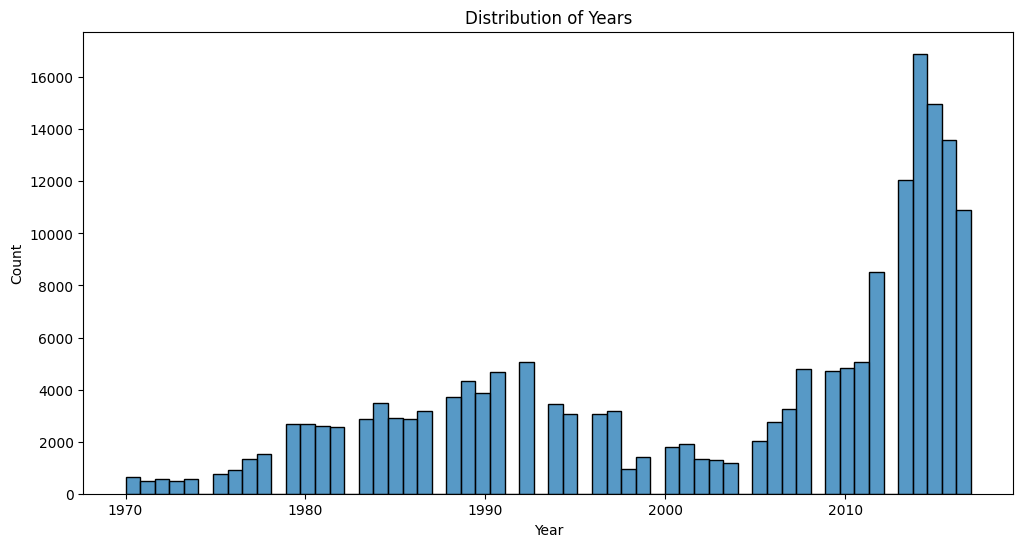

In [19]:
# Ploting the distribution of the 'iyear' attribute
plt.figure(figsize=(12,6))
sns.histplot(x=df['Iyear'])
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


* The histogram depicts the distribution of terrorist events by year. We can observe that the frequency of terrorist events has increased significantly since the early 2000s, peaking around 2014.

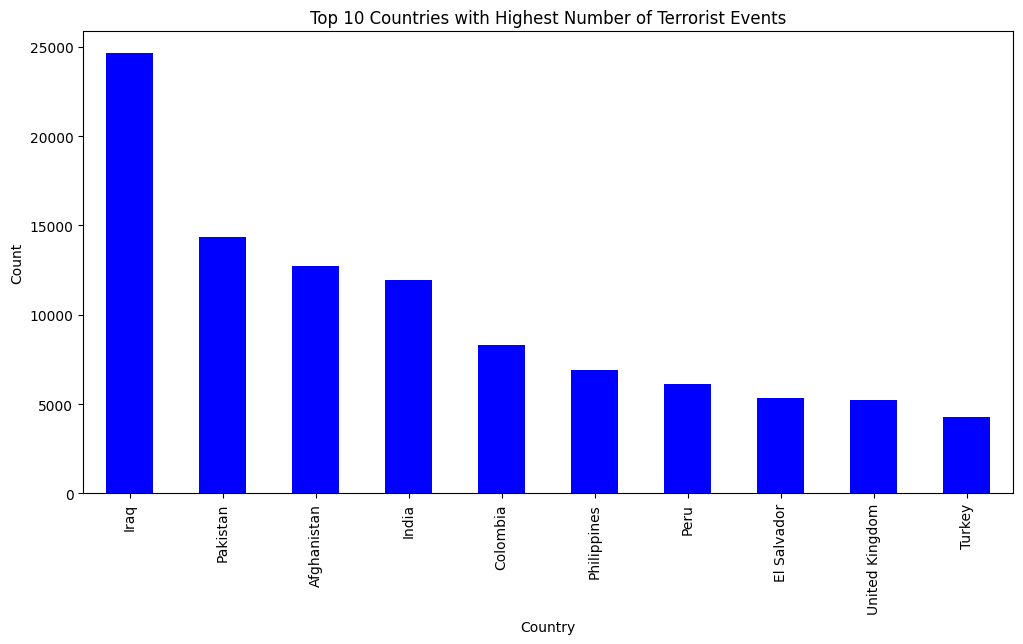

In [24]:
# Plot the top 10 countries with the highest number of terrorist events
plt.figure(figsize=(12,6))
df['Country_Txt'].value_counts().head(10).plot(kind='bar', color='blue')
plt.title('Top 10 Countries with Highest Number of Terrorist Events')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


* The bar chart displays the top 10 countries with the highest number of recorded terrorist events. According to the data, Iraq, Pakistan, Afghanistan, and India are among the countries most affected by terrorism.

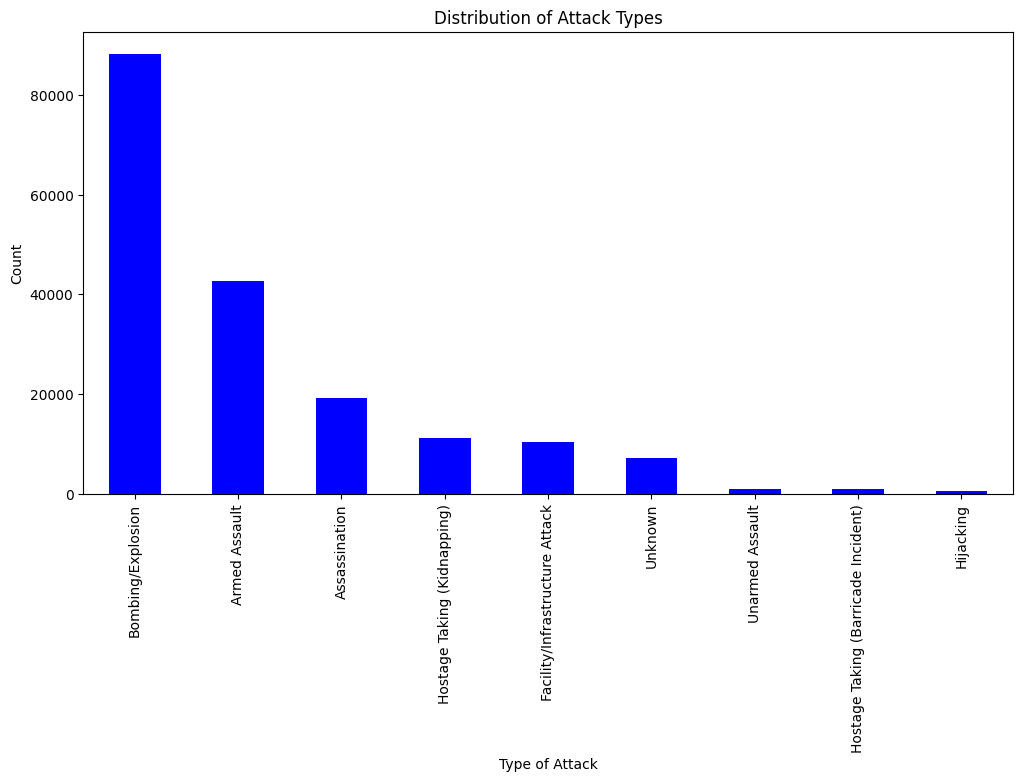

In [26]:
# Plot the distribution of attack types
plt.figure(figsize=(12,6))
df['Attacktype1_Txt'].value_counts().plot(kind='bar', color='blue')
plt.title('Distribution of Attack Types')
plt.xlabel('Type of Attack')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


* The bar chart displays the distribution of types of attacks. The most common types of attacks, according to the data, are bombings/explosions, armed assaults, and assassinations.

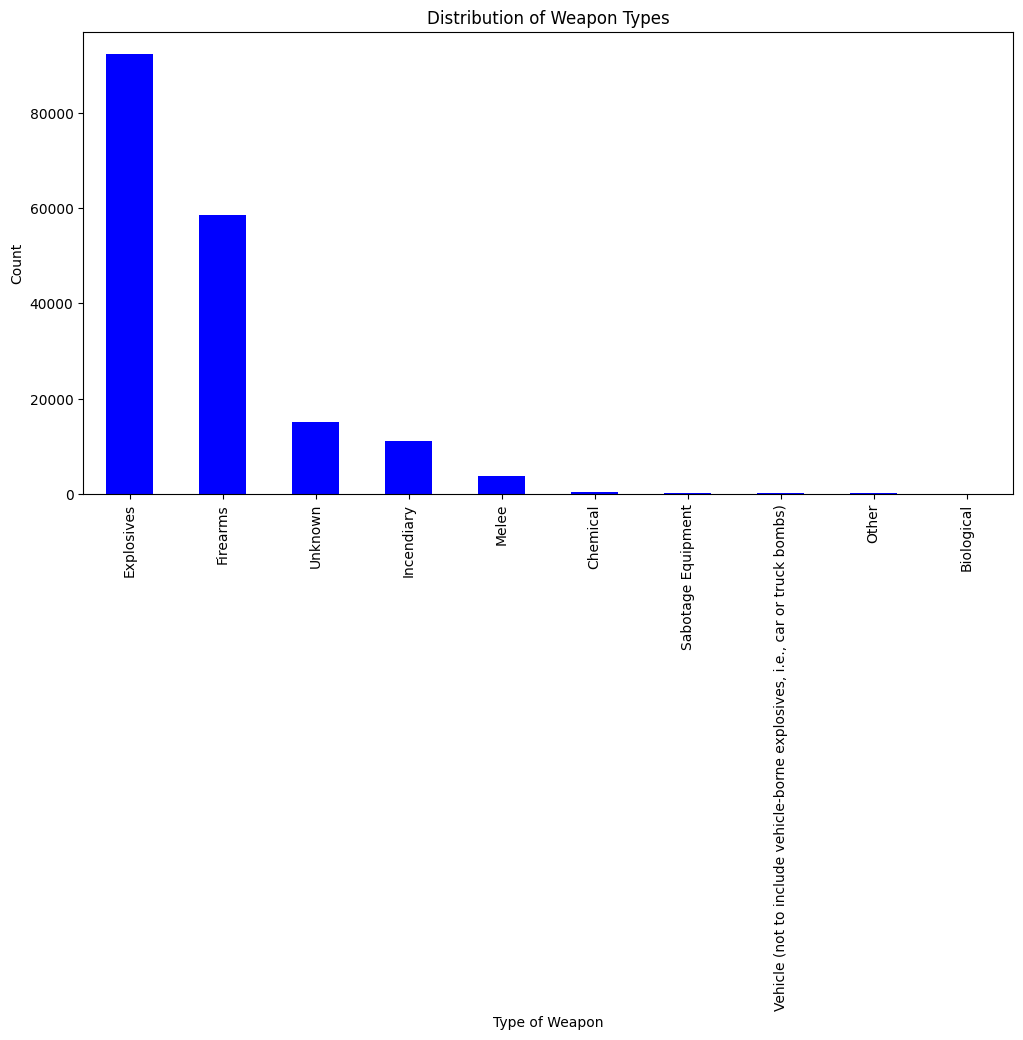

In [28]:
# Plot the distribution of weapon types
plt.figure(figsize=(12,6))
df['Weaptype1_Txt'].value_counts().head(10).plot(kind='bar', color='blue')
plt.title('Distribution of Weapon Types')
plt.xlabel('Type of Weapon')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


* The bar chart shows the distribution of the types of weapons used in these events. Explosives and firearms are the most commonly used weapons, according to the data.

## Understanding the Distribution Graph

* The relationship between the year (iyear) and the country (country_txt), specifically for the top 5 countries with the highest number of terrorist events.
* The relationship between the type of attack (attacktype1_txt) and the type of weapon used (weaptype1_txt).

# Meaning full Insights

In [30]:
# Get the top 5 countries with the highest number of terrorist events
top_countries = df['Country_Txt'].value_counts().head(5)
top_countries

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country_Txt, dtype: int64

In [40]:
# Only Columns
top_countries = df['Country_Txt'].value_counts().head(5).index
top_countries

Index(['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia'], dtype='object')

In [41]:
# Filter the data for these top 5 countries
df_top_countries = df[df['Country_Txt'].isin(top_countries)]
df_top_countries

,Eventid,Iyear,Imonth,Iday,Extended,Country,Country_Txt,Region,Region_Txt,Provstate,City,Latitude,Longitude,Specificity,Vicinity,Summary,Crit1,Crit2,Crit3,Doubtterr,Multiple,Success,Suicide,Attacktype1,Attacktype1_Txt,Targtype1,Targtype1_Txt,Targsubtype1,Targsubtype1_Txt,Corp1,Target1,Natlty1,Natlty1_Txt,Gname,Guncertain1,Individual,Nperps,Nperpcap,Claimed,Weaptype1,Weaptype1_Txt,Weapsubtype1,Weapsubtype1_Txt,Weapdetail,Nkill,Nkillus,Nkillter,Nwound,Nwoundus,Nwoundte,Property,Ishostkid,Scite1,Dbsource,Int_Log,Int_Ideo,Int_Misc,Int_Any
405,197007100001,1970,7,10,0,45,Colombia,3,South America,Caldas,Manizales,5.059097,-75.505960,2.0,0,Unknown,1,1,1,-9.0,0.0,1,0,6,Hostage Taking (Kidnapping),2,Government (General),18.0,"Government Personnel (excluding police, military)",government,"Fernand Londono, former cabinet minister",45.0,Colombia,Unknown,0.0,0,0.0,0.0,0.0,13,Unknown,0.0,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,Unknown,PGIS,-9,-9,0,-9
585,197011010001,1970,11,1,0,153,Pakistan,6,South Asia,Sindh,Karachi,24.891115,67.143311,1.0,0,Unknown,1,1,1,0.0,0.0,1,0,1,Assassination,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Polish Ministry of Foreign Affairs,Deputy Foreign Minister: Zygfryd Wolniak,161.0,Poland,Unknown,0.0,0,1.0,0.0,0.0,10,Vehicle (not to include vehicle-borne explosiv...,0.0,Unknown,Run down by car,4.0,0.0,0.0,20.0,0.0,0.0,0,0.0,Unknown,PGIS,-9,-9,1,1
1186,197202220004,1972,2,22,0,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,Unknown,1,1,1,0.0,0.0,1,0,4,Hijacking,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Lufthansa,B-747,75.0,Germany,Palestinians,0.0,0,5.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,Unknown,Hijacking DB,1,1,1,1
1392,197207170001,1972,7,17,0,45,Colombia,3,South America,Bogota,Bogota,4.594635,-74.093737,2.0,0,Unknown,1,1,1,0.0,0.0,1,0,1,Assassination,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",swedish govt,"First Secretary, Swedish Embassy, Kjeil R. Hac...",198.0,Sweden,Unknown,0.0,0,0.0,0.0,0.0,5,Firearms,3.0,Handgun,Pistol,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Unknown,PGIS,-9,-9,1,1
1640,197212000001,1972,12,0,1,45,Colombia,3,South America,Antioquia,Medellin,6.242026,-75.564766,1.0,0,Unknown,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),8,Educational Institution,48.0,Teacher/Professor/Instructor,univ. of Antioquia,"Jairo Duque Perez and associate, ex dean, law ...",45.0,Colombia,National Liberation Army of Colombia (ELN),0.0,0,0.0,0.0,0.0,13,Unknown,0.0,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,Unknown,PGIS,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181679,201712310012,2017,12,31,0,95,Iraq,10,Middle East & North Africa,Diyala,Muqdadiyah,33.953167,44.921906,1.0,1,12/31/2017: Assailants attacked volunteer figh...,1,1,0,1.0,0.0,0,0,2,Armed Assault,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Iraqi Volunteer Forces,Post,95.0,Iraq,Islamic State of Iraq and the Levant (ISIL),0.0,0,-99.0,0.0,0.0,5,Firearms,5.0,Unknown Gun Type,Unknown,13.0,0.0,13.0,0.0,0.0,0.0,0,0.0,"""13 IS militants killed in attack on paramilit...",START Primary Collection,0,1,0,1
181683,201712310018,2017,12,31,0,4,Afghanistan,6,South Asia,Faryab,Kohistan district,35.315467,64.815508,3.0,0,12/31/2017: Assailants attacked the house of a...,1,1,1,0.0,0.0,1,0,2,Armed Assault,17,Terrorists/Non-State Militia,94.0,Non-State Militia,National Uprising Movement (NUM),House of Member,4.0,Afghanistan,Taliban,0.0,0,-99.0,0.0,0.0,5,Firearms,5.0,Unknown Gun Type,Unknown,6.0,0.0,0.0,0.0,0.0,0.0,0,0.0,"""Six Members Of One Family Shot Dead In Faryab...",START Primary Collection,0,0,0,0
181684,201712310019,2017,12,31,0,92,India,6,South Asia,Assam,Hungrum,25.180162,93.015788,2.0,0,12/31/

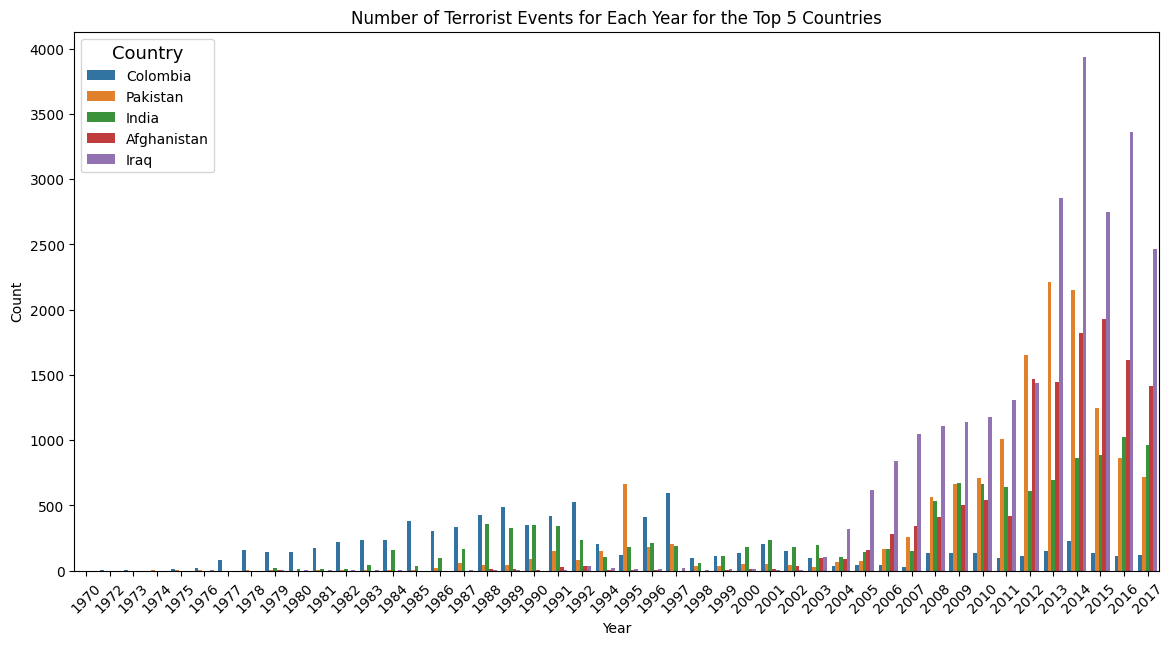

In [42]:
# Plot the number of terrorist events for each year for the top 5 countries
plt.figure(figsize=(14,7))
sns.countplot(data=df_top_countries, x='Iyear', hue='Country_Txt')
plt.title('Number of Terrorist Events for Each Year for the Top 5 Countries')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Country', title_fontsize='13', loc='upper left')
plt.show()


#### The plot shows the number of terrorist events for each year, specifically for the top 5 countries with the highest number of such events. We can observe the following:

* For Iraq, the number of terrorist events increased significantly after 2003, peaking around 2014.
* Pakistan and Afghanistan also experienced a surge in terrorist events around the same period.
* In India, the number of terrorist events seems to have remained relatively constant from 1990 onwards.
* The United States experienced a peak in terrorist events around 2001, likely due to the 9/11 attacks, but has had fewer such events since then,

Next, let's examine the relationship between the type of attack and the type of weapon used. We will create a cross-tabulation of these two attributes. Due to the large number of categories for both attributes, we will limit this analysis to the top 5 types of attacks and weapons.

In [45]:
# Get the top 5 types of attacks and weapons
top_attacks = df['Attacktype1_Txt'].value_counts().head(5).index
top_weapons = df['Weaptype1_Txt'].value_counts().head(5).index

In [46]:
top_attacks

Index(['Bombing/Explosion', 'Armed Assault', 'Assassination',
       'Hostage Taking (Kidnapping)', 'Facility/Infrastructure Attack'],
      dtype='object')

In [47]:
top_weapons

Index(['Explosives', 'Firearms', 'Unknown', 'Incendiary', 'Melee'], dtype='object')

In [49]:

# Filter the data for these top 5 types of attacks and weapons
df_top_attacks_weapons = df[df['Attacktype1_Txt'].isin(top_attacks) & df['Weaptype1_Txt'].isin(top_weapons)]
df_top_attacks_weapons

,Eventid,Iyear,Imonth,Iday,Extended,Country,Country_Txt,Region,Region_Txt,Provstate,City,Latitude,Longitude,Specificity,Vicinity,Summary,Crit1,Crit2,Crit3,Doubtterr,Multiple,Success,Suicide,Attacktype1,Attacktype1_Txt,Targtype1,Targtype1_Txt,Targsubtype1,Targsubtype1_Txt,Corp1,Target1,Natlty1,Natlty1_Txt,Gname,Guncertain1,Individual,Nperps,Nperpcap,Claimed,Weaptype1,Weaptype1_Txt,Weapsubtype1,Weapsubtype1_Txt,Weapdetail,Nkill,Nkillus,Nkillter,Nwound,Nwoundus,Nwoundte,Property,Ishostkid,Scite1,Dbsource,Int_Log,Int_Ideo,Int_Misc,Int_Any
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,Unknown,Santo Domingo,18.456792,-69.951164,1.0,0,Unknown,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,Unknown,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,0.0,0.0,0.0,13,Unknown,0.0,Unknown,Unknown,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Unknown,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,Unknown,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,7.0,0.0,0.0,13,Unknown,0.0,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,Unknown,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,Unknown,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,0.0,0.0,0.0,13,Unknown,0.0,Unknown,Unknown,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,Unknown,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,Unknown,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,Unknown,U.S. Embassy,217.0,United States,Unknown,0.0,0,0.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,Explosive,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,Unknown,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,Unknown,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,Unknown,U.S. Consulate,217.0,United States,Unknown,0.0,0,0.0,0.0,0.0,8,Incendiary,0.0,Unknown,Incendiary,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,Unknown,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,0.0,1,0,2,Armed Assault,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0,Somalia,Al-Shabaab,0.0,0,-99.0,0.0,1.0,5,Firearms,5.0,Unknown Gun Type,Unknown,1.0,0.0,0.0,2.0,0.0,0.0,-9,0.0,"""Somalia: Al-Shabaab Militants Attack Army Che...",START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,0.0,1,0,3,Bombing/Explosion,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,167.0,Russia,Muslim extremists,0.0,0,-99.0,0.0,0.0,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,0.0,"""Putin's 'victory' in Syria has turned into a ...",START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,0.0,1,0,7,Facility/Infrastructure Attack,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicab

In [50]:

# Create a cross-tabulation of the type of attack and the type of weapon
cross_tab = pd.crosstab(df_top_attacks_weapons['Attacktype1_Txt'], df_top_attacks_weapons['Weaptype1_Txt'])
cross_tab


Weaptype1_Txt,Explosives,Firearms,Incendiary,Melee,Unknown
Attacktype1_Txt,,,,,
Armed Assault,1982,36777,2242,1510,144
Assassination,3216,13614,137,785,1525
Bombing/Explosion,86791,756,212,6,413
Facility/Infrastructure Attack,6,1137,8314,116,576
Hostage Taking (Kidnapping),223,5256,133,589,4914


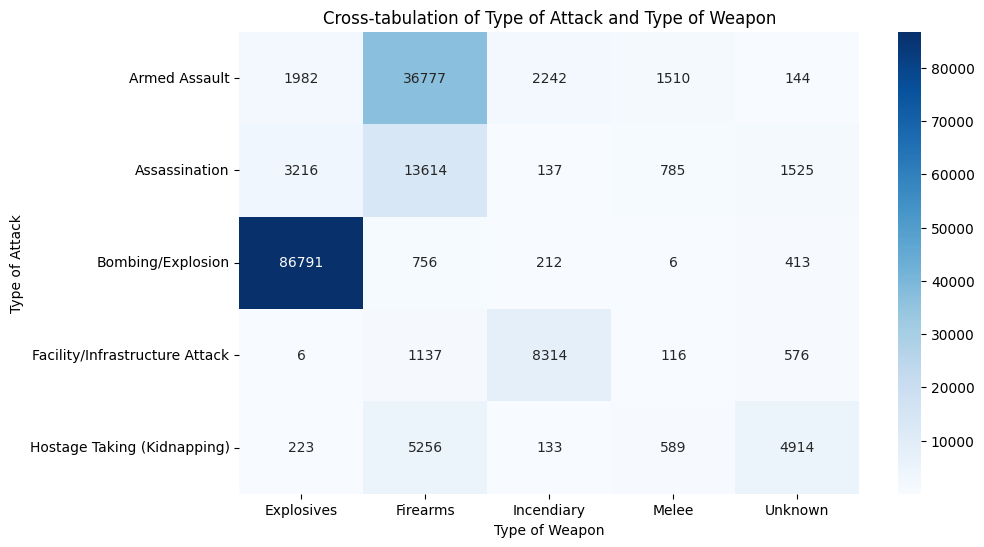

In [51]:

# Plot the cross-tabulation as a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Cross-tabulation of Type of Attack and Type of Weapon')
plt.xlabel('Type of Weapon')
plt.ylabel('Type of Attack')
plt.show()


### The heatmap shows the cross-tabulation of the types of attacks and the types of weapons. Each cell in the heatmap shows the number of terrorist events for a specific combination of attack type and weapon type. Darker colors represent higher numbers.

# Here are some insights from the heatmap:

* Explosives are most commonly used in bombings/explosions, which is expected.
* Firearms are frequently used in armed assaults and assassinations.
* Incendiary weapons are often used in facility/infrastructure attacks.